In [22]:
import pandas as pd
import numpy as np
from random import randint,uniform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model

In [2]:
dataset_columns = ['v'+str(i+1) for i in range(10)]+['mean','std']

In [3]:
dataset_columns

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'mean', 'std']

In [49]:
dataset = pd.DataFrame([],columns = dataset_columns)

for counter in range(100000):
  x = [uniform(1,10) for i in range(10)]
  line = x + [round(np.mean(x),2), round(np.std(x),2)]
  line = pd.DataFrame([line],columns = dataset_columns)
  dataset = pd.concat([dataset,line])

dataset = dataset.reset_index(drop = True)

In [5]:
len(dataset)

100000

In [6]:
len(dataset['mean'].unique())

572

In [7]:
len(dataset['std'].unique())

298

In [8]:
dataset.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,mean,std
0,7.724559,5.664665,1.678589,5.794970,1.727190,9.696658,9.350763,4.643704,5.620002,9.965677,6.19,2.87
1,4.868117,7.331869,7.758380,1.095970,3.962921,3.115421,5.670303,2.736219,6.070328,6.004073,4.86,2.01
2,8.094965,5.035054,8.613585,7.780120,4.281941,9.153222,5.356925,6.718595,5.224201,6.237931,6.65,1.60
3,2.201984,7.492813,6.846244,2.366613,5.401326,9.432572,4.819776,1.909529,3.625043,5.789474,4.99,2.37
4,9.773046,8.171208,9.999725,3.496321,5.733866,1.007584,2.149900,1.186874,1.783701,3.124105,4.64,3.34


In [ ]:
### Training

In [ ]:
### Data pre-processing

In [113]:
train, test = train_test_split(dataset,test_size = 0.22,shuffle = True)

In [114]:
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

In [115]:
train.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,mean,std
0,2.929395,2.868865,8.762203,6.133211,3.115184,4.179840,4.199504,1.455786,5.058576,5.380748,4.41,1.96
1,6.474368,5.144492,3.578768,2.181363,6.548577,1.566479,1.150435,5.406063,9.140129,4.261914,4.55,2.39


In [116]:
x_train = train.iloc[:,:-2]
x_test = test.iloc[:,:-2]

In [117]:
x_train.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,2.929395,2.868865,8.762203,6.133211,3.115184,4.179840,4.199504,1.455786,5.058576,5.380748
1,6.474368,5.144492,3.578768,2.181363,6.548577,1.566479,1.150435,5.406063,9.140129,4.261914


In [118]:
len(x_train)

78000

In [119]:
y_train = train.iloc[:,-2:]
y_test = test.iloc[:,-2:]

In [120]:
y_train.head(2)

,mean,std
0,4.41,1.96
1,4.55,2.39


In [121]:
len(y_train)

78000

In [122]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(x_train)
scaled_x_train = Xscaler.transform(x_train)
print(x_train.shape)

Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
print(scaled_y_train.shape)


(78000, 10)
(78000, 2)


In [123]:
print(scaled_y_train.shape)

(78000, 2)


In [124]:

Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(x_test)
scaled_x_test = Xscaler.transform(x_test)
print(x_test.shape)

Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_test)
scaled_y_test = Yscaler.transform(y_test)
print(scaled_y_test.shape)

(22000, 10)
(22000, 2)


In [125]:
scaled_x_test

array([[0.53312441, 0.06923202, 0.23319387, ..., 0.04830765, 0.39763046,
        0.44101477],
       [0.96425505, 0.07703342, 0.14028232, ..., 0.70960709, 0.56117047,
        0.59145284],
       [0.65228774, 0.94189122, 0.01827457, ..., 0.58544344, 0.4581358 ,
        0.25259203],
       ...,
       [0.52794977, 0.74780861, 0.3003526 , ..., 0.42788317, 0.13147696,
        0.02841144],
       [0.59769301, 0.0123199 , 0.02898104, ..., 0.27113151, 0.39069524,
        0.99185399],
       [0.94796504, 0.8070063 , 0.02563747, ..., 0.38893838, 0.62529676,
        0.78557392]])

In [126]:
### Model creation 

In [139]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(10,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error',
              optimizer='adam')
history = model.fit(scaled_x_train,
                    scaled_y_train,
                    steps_per_epoch=6,
                    epochs=250,
                    batch_size=1024,
                    validation_data=(scaled_x_test, scaled_y_test),
                    validation_steps=1)

Epoch 1/250
6/6 [==============================] - 1s 72ms/step - loss: 0.0170 - val_loss: 0.0202
Epoch 2/250
6/6 [==============================] - 0s 17ms/step - loss: 0.0167 - val_loss: 0.0198
Epoch 3/250
6/6 [==============================] - 0s 17ms/step - loss: 0.0161 - val_loss: 0.0195
Epoch 4/250
6/6 [==============================] - 0s 17ms/step - loss: 0.0154 - val_loss: 0.0190
Epoch 5/250
6/6 [==============================] - 0s 7ms/step - loss: 0.0153 - val_loss: 0.0186
Epoch 6/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0148 - val_loss: 0.0182
Epoch 7/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0180
Epoch 8/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0176
Epoch 9/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0142 - val_loss: 0.0174
Epoch 10/250
6/6 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.0170
Epoch 11/250
6/6 [=======

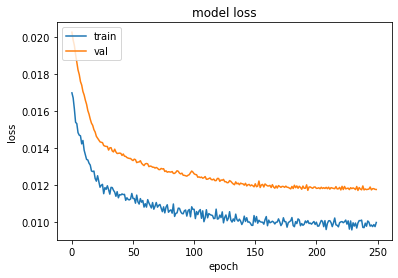

In [140]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

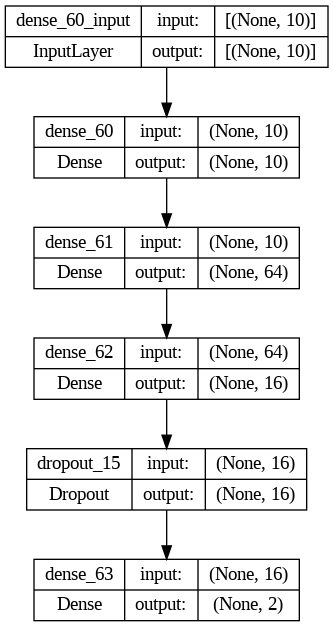

In [129]:
plot_model(model, to_file='/content/model_plot.png', show_shapes=True, show_layer_names=True)

In [130]:
##### Inference : 

In [141]:
model.evaluate(scaled_x_test,scaled_y_test)

688/688 [==============================] - 1s 2ms/step - loss: 0.0125


0.012467494234442711

In [146]:
x = [uniform(1,10) for i in range(10)]
mean_value = round(np.mean(x),2)
std_value = round(np.std(x),2)
x = pd.DataFrame([x])
x.head()

,0,1,2,3,4,5,6,7,8,9
0,6.657729,3.711592,6.28841,5.066761,3.605682,6.646683,9.672892,4.266687,6.668097,8.026731


In [147]:
x = Xscaler.transform(x)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [148]:
y_pred_scaled = model.predict(x)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
y_pred

1/1 [==============================] - 0s 48ms/step


array([[5.958615 , 1.9310502]], dtype=float32)

In [149]:
mean_value

6.06

In [150]:
std_value

1.84

In [160]:
comparison_cols = ['True','predicted' ]
comparison_idx = ['mean','standard deviation']
values = [[mean_value,y_pred[0][0]],[std_value,y_pred[0][1]]]

In [161]:
values

[[6.06, 5.958615], [1.84, 1.9310502]]

In [162]:
comparison = pd.DataFrame(values,index = comparison_idx, columns = comparison_cols)

In [163]:
comparison.head()

,True,predicted
mean,6.06,5.958615
standard deviation,1.84,1.931050


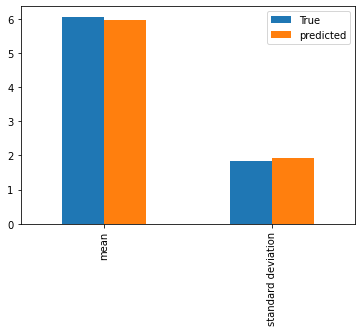

In [166]:
comparison.plot.bar();

In [167]:
###

In [204]:
Test_preds = model.predict(scaled_x_test)

688/688 [==============================] - 2s 2ms/step


In [205]:
Test_preds = Yscaler.inverse_transform(Test_preds)

In [206]:
real_values = Yscaler.inverse_transform(scaled_y_test)

In [207]:
real_values.shape

(22000, 2)

In [212]:
real_values[:,0]

array([4.43, 5.72, 5.26, ..., 4.89, 5.47, 5.89])

In [213]:
mean_real_values = real_values[:,0]
mean_preds = Test_preds[:,0]
std_real_values = real_values[:,1]
std_preds = Test_preds[:,1]

In [214]:
mean_comparison = pd.DataFrame([],columns = ['Real value','Predicted value'])
std_comparison = pd.DataFrame([],columns = ['Real value','Predicted value'])

In [215]:
mean_comparison['Real value'] = mean_real_values
std_comparison['Real value'] = std_real_values
mean_comparison['Predicted value'] = mean_preds
std_comparison['Predicted value'] = std_preds

In [216]:
std_comparison.head()

,Real value,Predicted value
0,2.44,2.426316
1,2.66,2.317133
2,2.73,2.448724
3,2.42,2.070280
4,2.17,2.108373


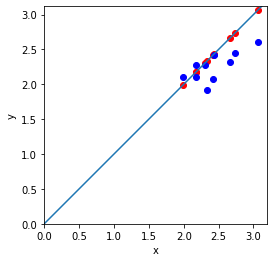

In [222]:
plt.scatter(std_real_values[:10],std_real_values[:10], c='r')
plt.scatter(std_real_values[:10],std_preds[:10], c='b')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-10,10],[-10,10])

In [217]:
mean_comparison.head()

,Real value,Predicted value
0,4.43,4.951181
1,5.72,5.173272
2,5.26,4.905600
3,6.18,5.675402
4,6.22,5.597917


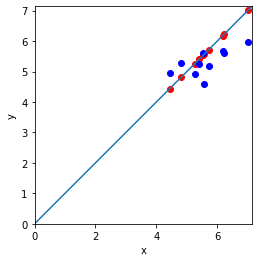

In [221]:
plt.scatter(mean_real_values[:10],mean_real_values[:10], c='r')
plt.scatter(mean_real_values[:10],mean_preds[:10], c='b')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-10,10],[-10,10])